# Obesity Classification

In this notebook I will explore obesity multi-class classification from this [Kaggle Contest](https://www.kaggle.com/competitions/playground-series-s4e2/overview). I will explore several Machine Learning alternatives to aboard this problem, also use Grid Search Cross Validation. The mean runing time of this notebook is 12-16 hours.

## Common imports

First, let's import the used libraries.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import joblib 
from sklearn.metrics import accuracy_score

sns.set()

## Data importing and analysis

Let's see how the data is organized...

In [2]:
df = pd.read_csv('./../data/train.csv')
df.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [3]:
df = df.drop('id', axis='columns')
df.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [4]:
df.describe()

Age        Height        Weight          FCVC           NCP  \
count  20758.000000  20758.000000  20758.000000  20758.000000  20758.000000   
mean      23.841804      1.700245     87.887768      2.445908      2.761332   
std        5.688072      0.087312     26.379443      0.533218      0.705375   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.631856     66.000000      2.000000      3.000000   
50%       22.815416      1.700000     84.064875      2.393837      3.000000   
75%       26.000000      1.762887    111.600553      3.000000      3.000000   
max       61.000000      1.975663    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  
mean       2.029418      0.981747      0.616756  
std        0.608467      0.838302      0.602113  
min        1.000000      0.000000      0.000000  
25%        1.792022      0.008013      0.000000  
50%        2.000000      1.000000      0.573887  
75%        2.549617      1.587406      1.000000  
max        3.000000      3.000000      2.000000

As we can see, the data has valid values from the known columns such as Age, Height and Weight. Let's continue analizing the data types.

In [5]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

I need to check the categorical columns if they have some undesired value.

In [6]:
object_cols = ['Gender', 
               'family_history_with_overweight',
               'FAVC',
               'CAEC',
               'SMOKE',
               'SCC',
               'CALC',
               'MTRANS'
              ]

for col in object_cols:
    display(df[col].value_counts())

Gender
Female    10422
Male      10336
Name: count, dtype: int64

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

FAVC
yes    18982
no      1776
Name: count, dtype: int64

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

SMOKE
no     20513
yes      245
Name: count, dtype: int64

SCC
no     20071
yes      687
Name: count, dtype: int64

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

All the categorical variables has valid values, let's store it for testing step.

In [7]:
drop_dummies_table = {
    'Gender' : df.Gender.unique(),
    'family_history_with_overweight' : df.family_history_with_overweight.unique(),
    'FAVC' : df.FAVC.unique(),
    'CAEC' : df.CAEC.unique(),
    'SMOKE' : df.SMOKE.unique(),
    'SCC' : df.SCC.unique(),
    'CALC' : df.CALC.unique(),
    'MTRANS' : df.MTRANS.unique(),
}

Then drop dummie variables and keep the results

In [8]:
def my_drop_dummies(df, drop_dummies_table):
    for obj_col, values in drop_dummies_table.items():
        for val in values:
            temp_col = df[obj_col].apply(lambda x: int(x==val))
            df[f'{obj_col}_{val}'] = temp_col
        df = df.drop(obj_col, axis='columns')
    return df

In [9]:
df = my_drop_dummies(df, drop_dummies_table)

In [10]:
df.head()

Age    Height      Weight      FCVC       NCP      CH2O       FAF  \
0  24.443011  1.699998   81.669950  2.000000  2.983297  2.763573  0.000000   
1  18.000000  1.560000   57.000000  2.000000  3.000000  2.000000  1.000000   
2  18.000000  1.711460   50.165754  1.880534  1.411685  1.910378  0.866045   
3  20.952737  1.710730  131.274851  3.000000  3.000000  1.674061  1.467863   
4  31.641081  1.914186   93.798055  2.679664  1.971472  1.979848  1.967973   

        TUE           NObeyesdad  Gender_Male  ...  SCC_no  SCC_yes  \
0  0.976473  Overweight_Level_II            1  ...       1        0   
1  1.000000        Normal_Weight            0  ...       1        0   
2  1.673584  Insufficient_Weight            0  ...       1        0   
3  0.780199     Obesity_Type_III            0  ...       1        0   
4  0.931721  Overweight_Level_II            1  ...       1        0   

   CALC_Sometimes  CALC_no  CALC_Frequently  MTRANS_Public_Transportation  \
0               1        0                0                             1   
1               0        1                0                             0   
2               0        1                0                             1   
3               1        0                0                             1   
4               1        0                0                             1   

   MTRANS_Automobile  MTRANS_Walking  MTRANS_Motorbike  MTRANS_Bike  
0                  0               0                 0            0  
1                  1               0                 0            0  
2                  0               0                 0            0  
3                  0               0                 0            0  
4                  0               0                 0            0  

[5 rows x 31 columns]

## Data Visualization

### Label Distribution

First, let's see if the data is unbalanced.

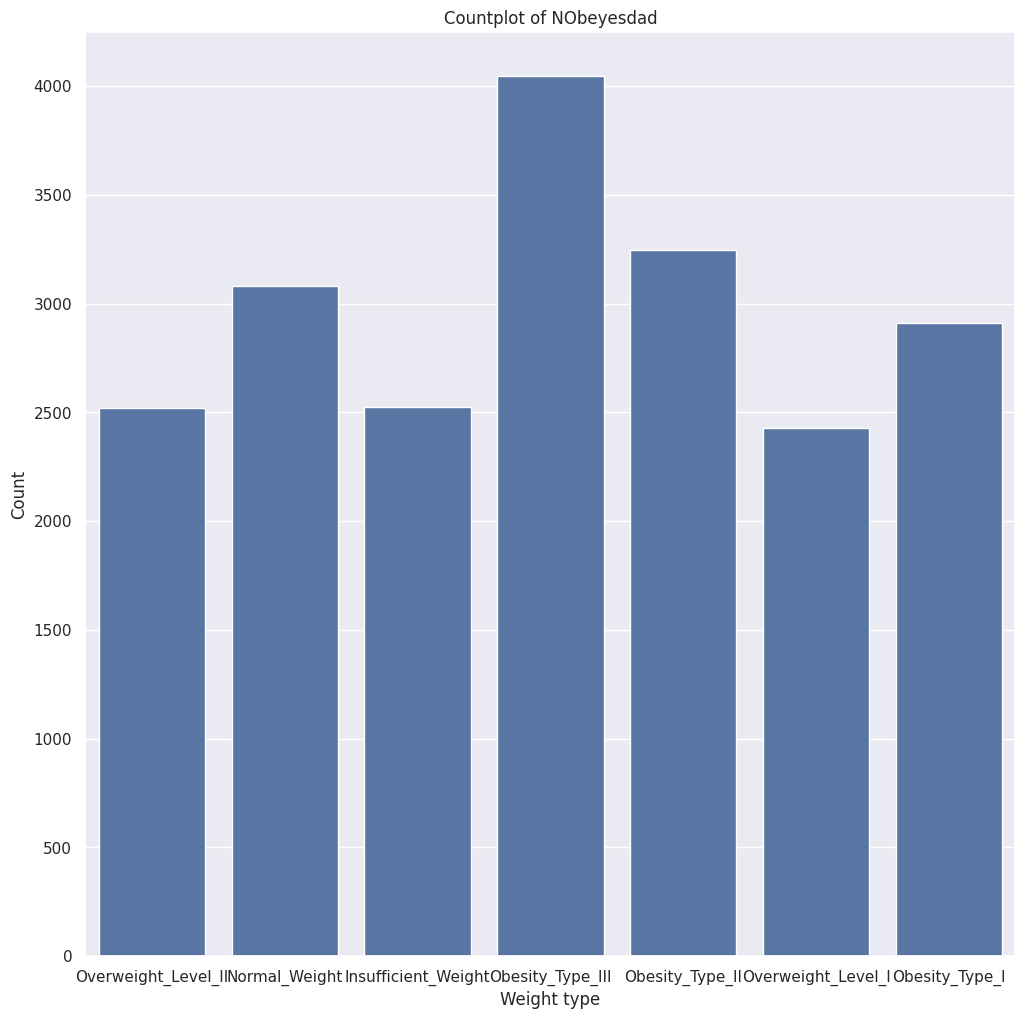

In [11]:
plt.figure(figsize=(12, 12))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Countplot of NObeyesdad')
plt.xlabel('Weight type')
plt.ylabel('Count')
plt.savefig('./../visualizations/Countplot_of_NObeyesdad.png')
plt.show()

It is unbalanced, but not so much for dropping some columns.

### Outlier Searching

Let's search for outliers in the numerical variables.

In [12]:
numeric_cols = list()
for col in df.columns: 
    if df[col].dtype == 'float64':
        numeric_cols.append(col)

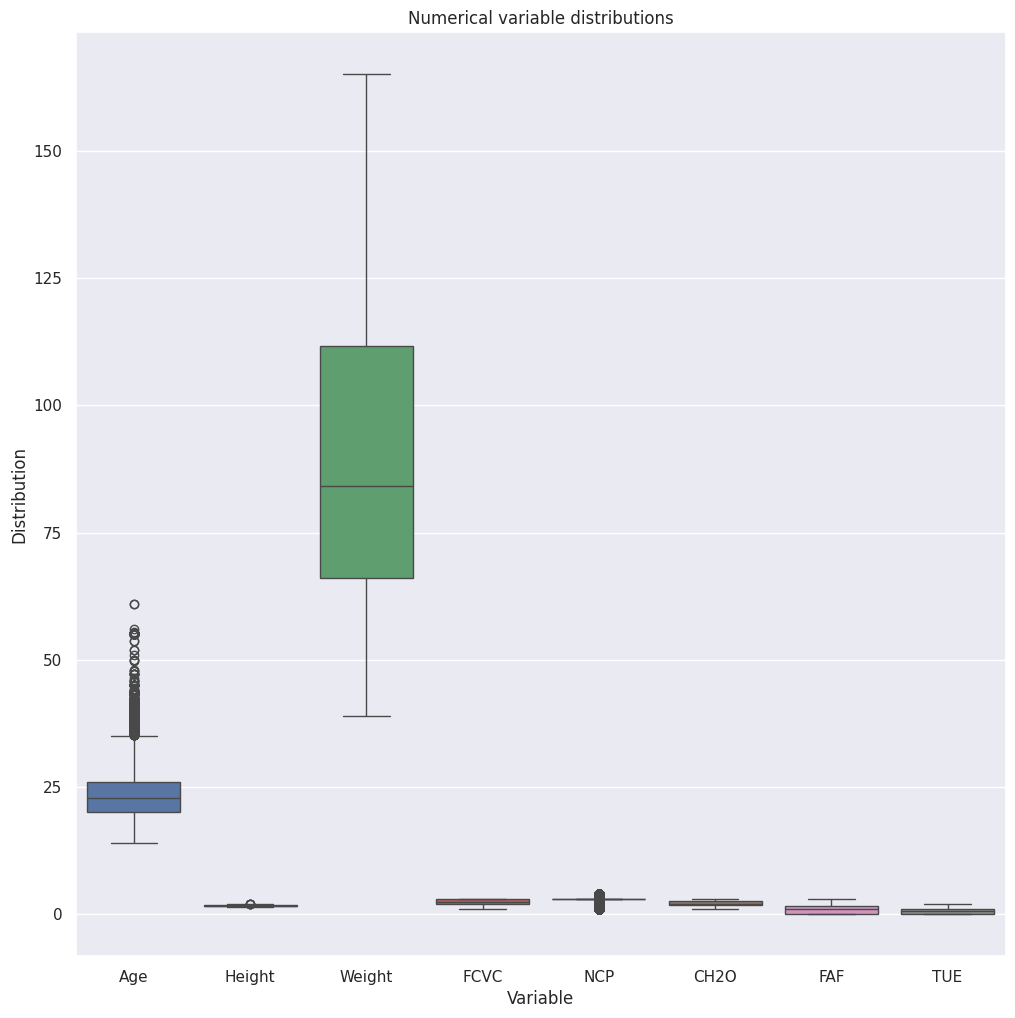

In [13]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=df[numeric_cols])
plt.title('Numerical variable distributions')
plt.xlabel('Variable')
plt.ylabel('Distribution')
plt.savefig('./../visualizations/Numerical_variable_distributions.png')
plt.show()

It don't seem dirty, as we mention it keeps in valid values.

### See the numerical variables vs labels in obesity

Now I want to see if there are numerical variable that are related to some lablel.

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']


<Figure size 1200x1200 with 0 Axes>

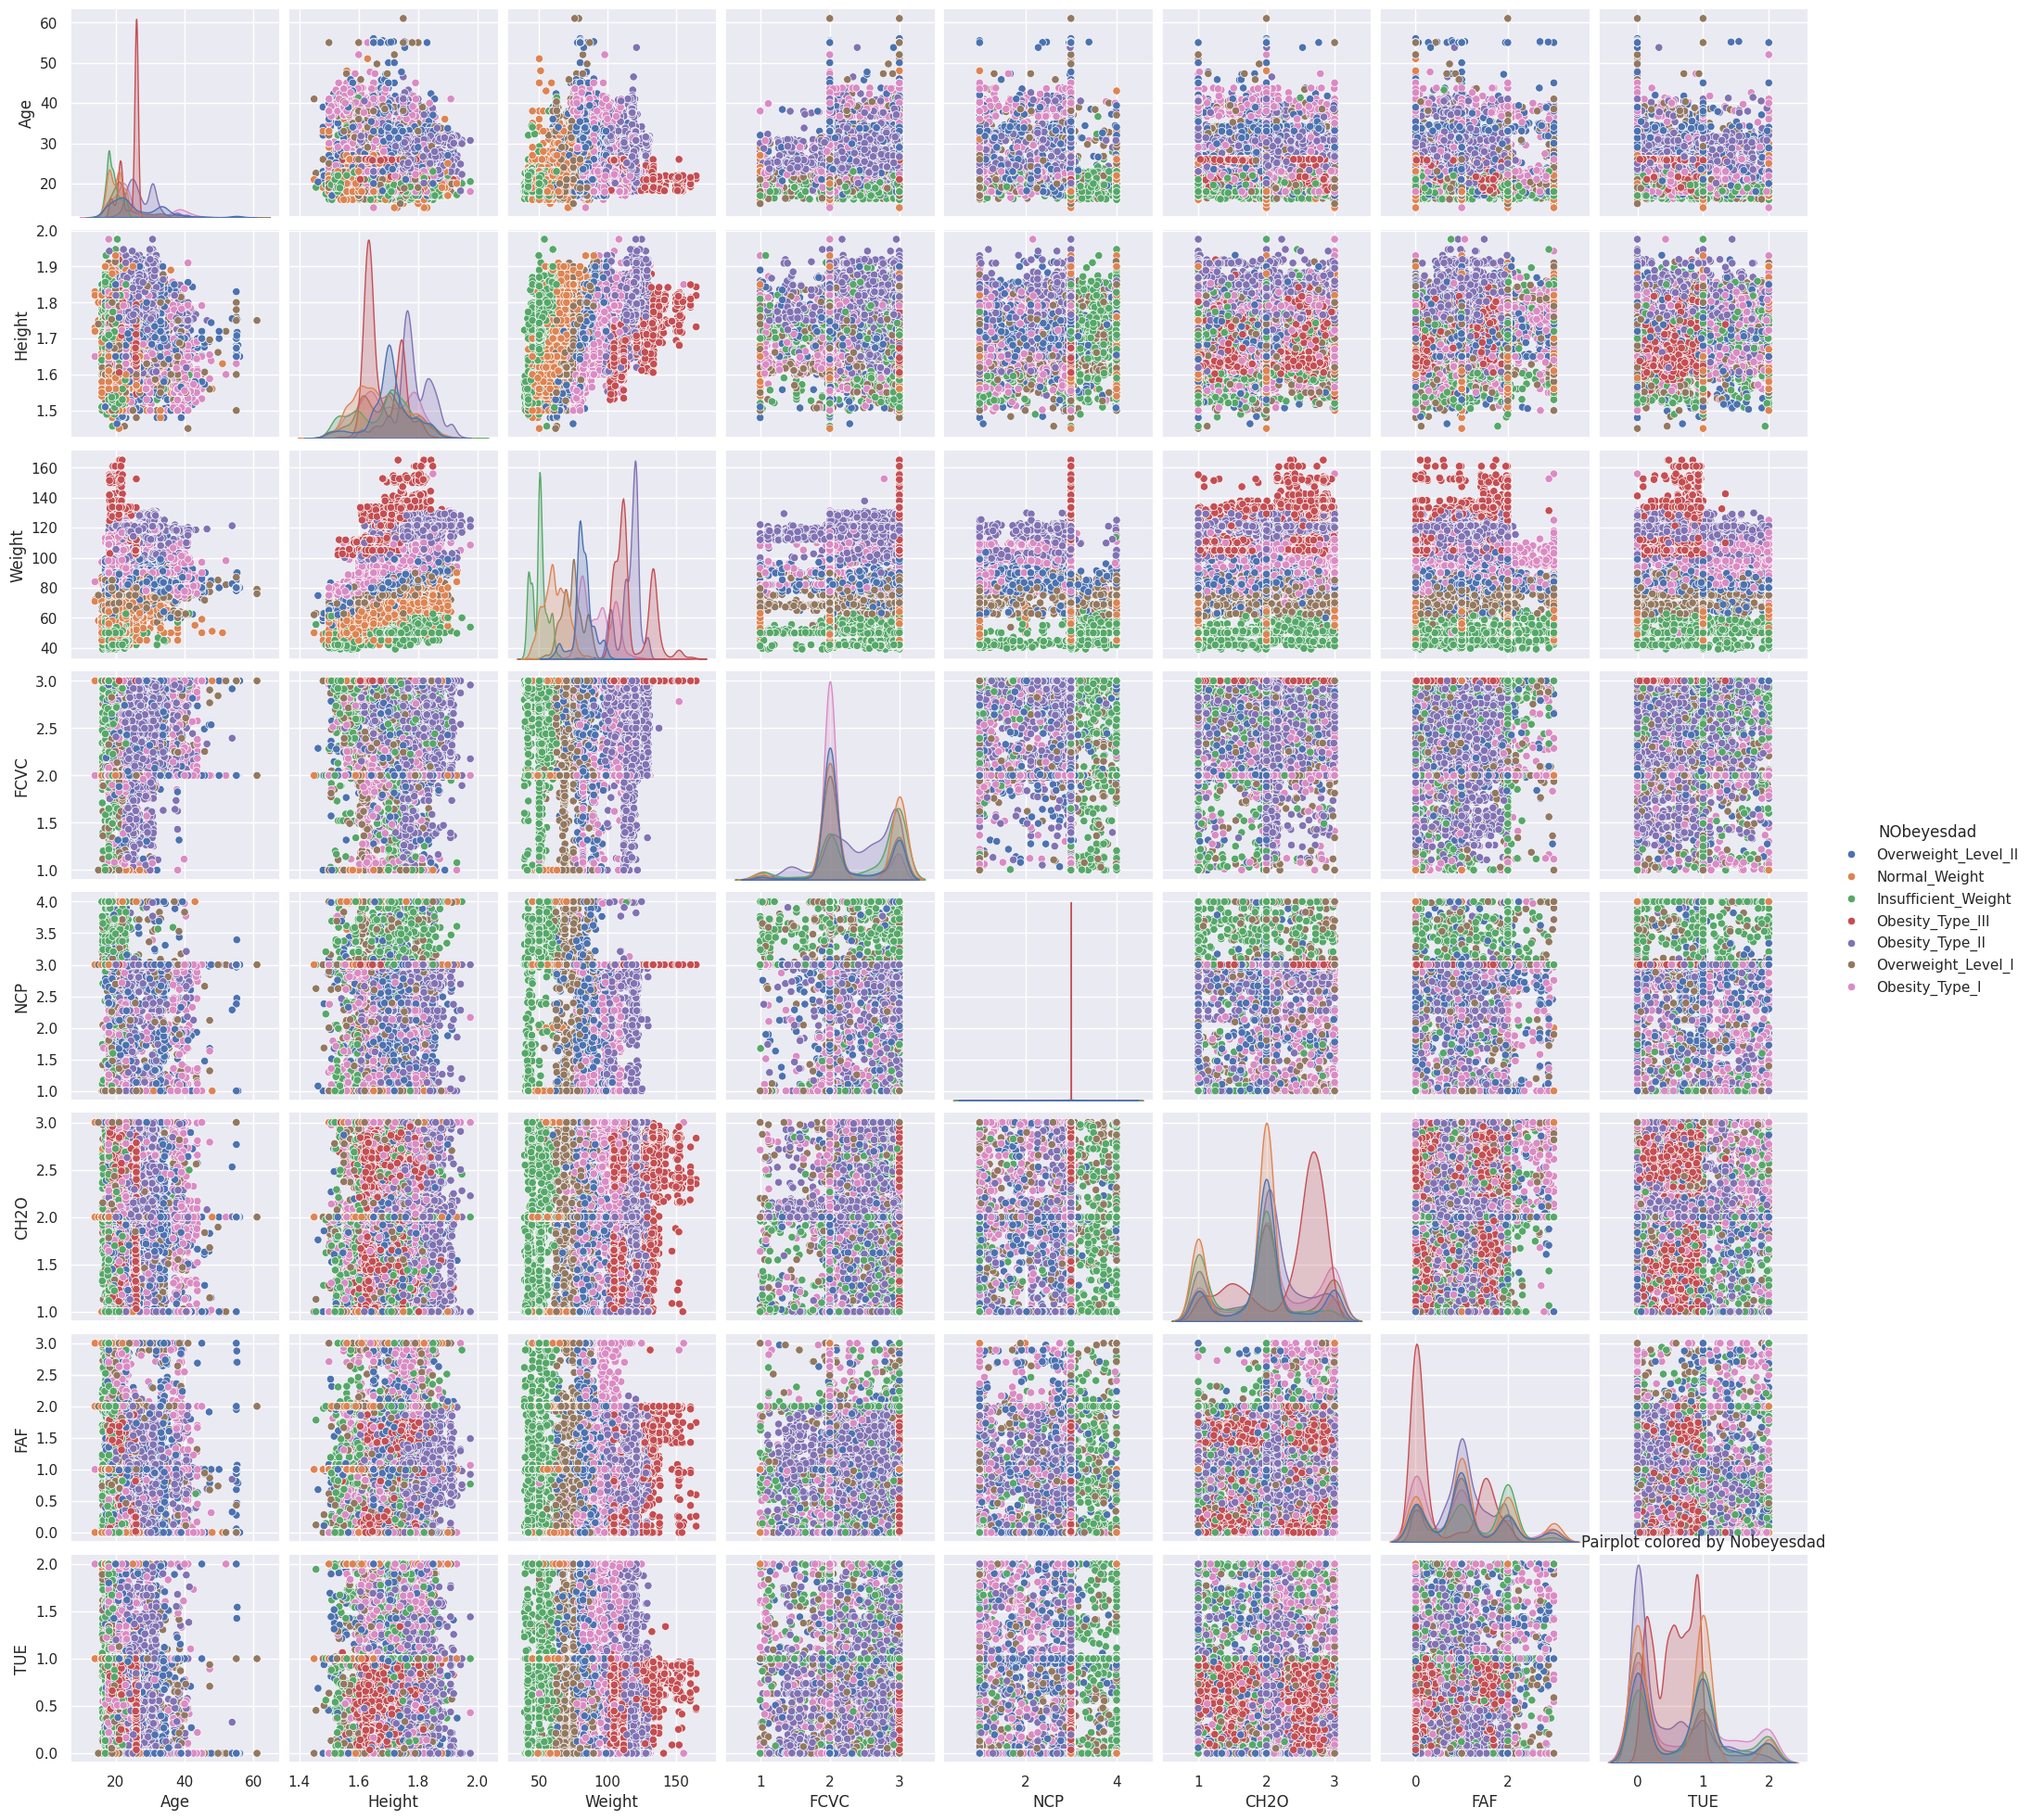

In [14]:
selected_columns = numeric_cols + ["NObeyesdad"]
print(selected_columns)
plt.figure(figsize=(12, 12))

sns.pairplot(data=df[selected_columns], hue='NObeyesdad', diag_kind='kde')
plt.title('Pairplot colored by Nobeyesdad')

plt.savefig('./../visualizations/Pairplot_colored_by_Nobeyesdad.png')

plt.show()

As we can asume, Weight and Height are closely related to obesity types types. In this plot, we are searching for no overlaping curves in the diagonal and a kind of separation in other values.

## Data Preparation

We need to normalize the data for further analysis.

In [15]:
df.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [16]:
obesity_parse = {
    'Obesity_Type_III':0,
    'Obesity_Type_II':1,
    'Normal_Weight':2,
    'Obesity_Type_I':3,
    'Insufficient_Weight':4,
    'Overweight_Level_II':5,
    'Overweight_Level_I':6
}
obesity_inverse = {idx:label for label, idx in obesity_parse.items()}

In [17]:
df.NObeyesdad = df.NObeyesdad.apply(lambda x: obesity_parse[x])

In [18]:
df.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
NObeyesdad                              int64
Gender_Male                             int64
Gender_Female                           int64
family_history_with_overweight_yes      int64
family_history_with_overweight_no       int64
FAVC_yes                                int64
FAVC_no                                 int64
CAEC_Sometimes                          int64
CAEC_Frequently                         int64
CAEC_no                                 int64
CAEC_Always                             int64
SMOKE_no                                int64
SMOKE_yes                               int64
SCC_no                            

## Model Selection

Now, for Grid Search CV, we need to separate the data in X and y.

In [19]:
X = df.drop('NObeyesdad', axis = 'columns')
y = df['NObeyesdad']

In [45]:
X_cols = list(X.columns)
X_cols

['Age',
 'Height',
 'Weight',
 'FCVC',
 'NCP',
 'CH2O',
 'FAF',
 'TUE',
 'Gender_Male',
 'Gender_Female',
 'family_history_with_overweight_yes',
 'family_history_with_overweight_no',
 'FAVC_yes',
 'FAVC_no',
 'CAEC_Sometimes',
 'CAEC_Frequently',
 'CAEC_no',
 'CAEC_Always',
 'SMOKE_no',
 'SMOKE_yes',
 'SCC_no',
 'SCC_yes',
 'CALC_Sometimes',
 'CALC_no',
 'CALC_Frequently',
 'MTRANS_Public_Transportation',
 'MTRANS_Automobile',
 'MTRANS_Walking',
 'MTRANS_Motorbike',
 'MTRANS_Bike']

### Training a Logistic Regression with GridSearchCV

In [20]:
lr_base = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

param_grid_lr = {
    'classifier__penalty': ['l1', 'l2'], 
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'classifier__max_iter': [100, 200, 300], 
    'classifier__class_weight': [None, 'balanced'],  
    'classifier__random_state': [42]
}

In [21]:
lr_grid = GridSearchCV(lr_base, param_grid_lr, cv=5, n_jobs=-1).fit(X, y)

/home/reiki/anaconda3/envs/dtsa-5509/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/reiki/anaconda3/envs/dtsa-5509/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/reiki/anaconda3/envs/dtsa-5509/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/reiki/anaconda3/envs/dtsa-5509/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/reiki/anaconda3/envs/dtsa-5509/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

### Training a kNN with GridSearchCV

In [22]:
knn_base = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15], 
    'classifier__weights': ['uniform', 'distance'],  
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'classifier__leaf_size': [10, 20, 30, 40, 50], 
    'classifier__p': [1, 2], 
    'classifier__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'classifier__n_jobs': [-1], 
}

In [23]:
knn_grid = GridSearchCV(knn_base, param_grid_knn, cv=5, n_jobs=-1).fit(X, y)

### Train a Random Forest Classifier with GridSearchCV

In [28]:
rf_base = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 150], 
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20], 
    'classifier__min_samples_split': [2, 5], 
    'classifier__min_samples_leaf': [1, 2], 
    'classifier__max_features': ['auto', 'sqrt'], 
    'classifier__bootstrap': [True], 
    'classifier__oob_score': [False], 
    'classifier__class_weight': [None, 'balanced'], 
    'classifier__random_state': [42]
}

In [ ]:
rf_grid = GridSearchCV(rf_base, param_grid_rf, cv=5, n_jobs=-1).fit(X, y)

### Train a Support Vector Machine with GridSearchCV

In [30]:
svc_base = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

param_grid_svc = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'classifier__degree': [2, 3, 4, 5],  
    'classifier__gamma': ['scale', 'auto'], 
    'classifier__shrinking': [True], 
    'classifier__probability': [False], 
    'classifier__class_weight': [None, 'balanced'], 
    'classifier__decision_function_shape': ['ovo'],  
    'classifier__random_state': [42] 
}

In [31]:
svc_grid = GridSearchCV(svc_base, param_grid_svc, cv=5, n_jobs=-1).fit(X, y)

### Train a XGBoost Classifier with GridSearchCV

In [36]:
xgb_base = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier())
])

param_grid_xgb = {
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.01, 0.05],
    'classifier__n_estimators': [100, 200], 
    'classifier__min_child_weight': [1, 2], 
    'classifier__gamma': [0, 0.1], 
    'classifier__subsample': [0.7, 0.8], 
    'classifier__colsample_bytree': [0.7, 0.8],
    'classifier__reg_alpha': [0, 0.01], 
    'classifier__reg_lambda': [0, 0.01], 
    'classifier__booster': ['gbtree'], 
    'classifier__tree_method': ['auto', 'hist'], 
    'classifier__random_state': [42] 
}

In [37]:
xgb_grid = GridSearchCV(xgb_base, param_grid_xgb, cv=5, n_jobs=-1).fit(X, y)

## Comparing Models

In [40]:
list_grids = {
    'LogisticRegression':lr_grid,
    'KNN':knn_grid,
    'RandomForest': rf_grid, 
    'SVC': svc_grid, 
    'XGBoostClassifier': xgb_grid
}

In [41]:
best_score = 0
best_model = None
best_model_name = None

In [42]:
for name, model_grid in list_grids.items():
    current_score = model_grid.best_score_
    current_model = model_grid.best_estimator_
    print(f"{name} Best Parameters: ", model_grid.best_params_)
    print(f"{name} Best Scores: ", current_score)
    if current_score > best_score:
        best_score = current_score
        best_model = current_model
        best_model_name = name

LogisticRegression Best Parameters:  {'classifier__C': 100, 'classifier__class_weight': None, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__random_state': 42, 'classifier__solver': 'lbfgs'}
LogisticRegression Best Scores:  0.8664132978148127
KNN Best Parameters:  {'classifier__algorithm': 'auto', 'classifier__leaf_size': 10, 'classifier__metric': 'manhattan', 'classifier__n_jobs': -1, 'classifier__n_neighbors': 11, 'classifier__p': 1, 'classifier__weights': 'distance'}
KNN Best Scores:  0.776615867569576
RandomForest Best Parameters:  {'classifier__bootstrap': True, 'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 150, 'classifier__oob_score': False, 'classifier__random_state': 42}
RandomForest Best Scores:  0.8933907213666739
SVC Best Parameters:  {'classifier__C': 10, '

## Winner XGBoost

In [43]:
print(f'The best model is a {best_model_name} with a {best_score} of accuracy')

The best model is a XGBoostClassifier with a 0.9085654314557997 of accuracy


In [44]:
joblib.dump(best_model, './../model/best_model.joblib')

['./../model/best_model.joblib']

In [48]:
model = joblib.load('./../model/best_model.joblib')

In [49]:
preds = model.predict(X)

accuracy = accuracy_score(y, preds)

print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.9270160901820985
